# 1. Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:

- a. изменение слоёв и их количества;
- b. изменение метода оптимизации; 
- c. изменение процесса обучения; 
- d. для продвинутых: преобразование данных.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

import torchvision
from torchvision import transforms

In [2]:
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True,
                                             download=True,
                                             transform=transforms.ToTensor())

test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                            train=False,
                                            download=False, 
                                            transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=4,
                                          shuffle=False)

Extracting ./data/cifar-10-python.tar.gz to ./data/


torch.Size([3, 32, 32])
6


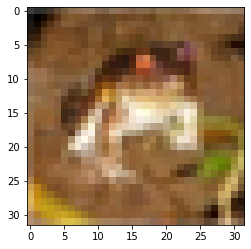

In [3]:
image, label = train_dataset[0]

print (image.size())
print (label)

plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [5]:
# nn.Conv2d?

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3,  out_channels=6, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16 * 5 * 5)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        pred = self.fc3(x)
        return pred

In [7]:
net = Net() # создание модели

criterion = nn.CrossEntropyLoss() # loss функция

optimizerAdam = optim.Adam(
    net.parameters(), 
    lr=0.001)

optimizerAdamW = optim.AdamW(
    net.parameters(), 
    lr=0.001)

optimizerSGD = optim.SGD(
    net.parameters(), 
    lr=0.001, # шаг обучения
    momentum=0.9) # оптитимизтор - стохастический градиентный спуск

In [8]:
df = pd.DataFrame(columns=['epoch', 'loss']).set_index('epoch')

In [9]:
for epoch in range(15): 
    running_loss = 0.0 # Для вывода процесса обучения
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        optimizerAdam.zero_grad() # Обнуляем градиент
    
        outputs = net(inputs) # Делаем предсказание
        loss = criterion(outputs, labels) # Рассчитываем лосс-функцию
        
        loss.backward() # Делаем шаг назад по лоссу
        optimizerAdam.step() # Делаем шаг нашего оптимайзера

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            df.loc[epoch + 1, 'loss'] = round((running_loss / 2000), 2)
            running_loss = 0.0

print('Training is finished!')

[1, 1] loss: 0.001153780460357666
[1, 301] loss: 0.3048271849155426
[1, 601] loss: 0.26800701242685315
[2, 1] loss: 0.0008400769829750061
[2, 301] loss: 0.23861371129751205
[2, 601] loss: 0.22979897660017012
[3, 1] loss: 0.0007058106660842896
[3, 301] loss: 0.21601501691341402
[3, 601] loss: 0.2099142756462097
[4, 1] loss: 0.0006872926354408264
[4, 301] loss: 0.20129573383927346
[4, 601] loss: 0.19744781437516212
[5, 1] loss: 0.0006161530613899231
[5, 301] loss: 0.1891324435174465
[5, 601] loss: 0.18554924961924552
[6, 1] loss: 0.0005499941706657409
[6, 301] loss: 0.17942473903298378
[6, 601] loss: 0.17833906242251396
[7, 1] loss: 0.0005317102074623108
[7, 301] loss: 0.17258567908406258
[7, 601] loss: 0.1728068251311779
[8, 1] loss: 0.0007019271850585938
[8, 301] loss: 0.16521738880872727
[8, 601] loss: 0.1658580737411976
[9, 1] loss: 0.0005278790593147278
[9, 301] loss: 0.15981046971678733
[9, 601] loss: 0.16267084321379663
[10, 1] loss: 0.00043843263387680054
[10, 301] loss: 0.155956

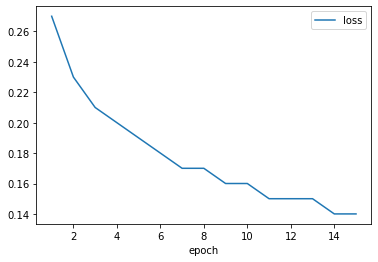

,loss
epoch,
11,0.15
12,0.15
13,0.15
14,0.14
15,0.14


In [10]:
df.plot()
plt.show()

df.tail()

In [11]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

conv1.weight  \  torch.Size([6, 3, 3, 3])
conv1.bias  \  torch.Size([6])
conv2.weight  \  torch.Size([16, 6, 5, 5])
conv2.bias  \  torch.Size([16])
fc1.weight  \  torch.Size([120, 400])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([84, 120])
fc2.bias  \  torch.Size([84])
fc3.weight  \  torch.Size([10, 84])
fc3.bias  \  torch.Size([10])


In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

In [14]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

GroundTruth:    cat  ship  ship plane


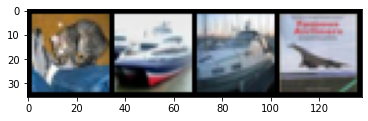

In [15]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)

plt.imshow(imgs.permute(1, 2, 0).numpy())

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 2. Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

Не понял где это происходит, вроде бы эпохи есть

# 3. Переписать эту программу на PyTorch:

In [16]:
class NetSequential(nn.Sequential):
    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.lin1 = nn.Linear(128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.lin2 = nn.Linear(10)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.flatten()
        x = self.lin1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.lin2(x)
        
        pred = self.softmax(x)
        return pred

Не нашел аналог Dense в докумментации. Делал немного в слепую и как понимал.